The following notebook reads in the survey results from the past three years (2018-2020) and generates plots of the most popular languages developers want to use in the following year. Years 2016 and 2017 are omitted due to a lack of language usage data in the surveys.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

# Read in the 2019 results and schema as a test to ensure all is correctly organized and the data can be found.
df = pd.read_csv('../developer_survey_2019/survey_results_public.csv')
schema = pd.read_csv('../developer_survey_2019/survey_results_schema.csv')
df.head()


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
# Show the schema.
schema


,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


In [4]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc

#This code has been directly referenced from the lesson.
get_description('LanguageDesireNextYear')


'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In order to assess the languages users wish to use next year, we'll need to determine all of the options from the survey. This can also be manually done by viewing the PDF of the survey itself. Note, the first two years (2016 and 2017) are not included. This is because the LanguageDesireNextYear column was not present (i.e., the question was not asked) nor was there a similar column available in the data.

In [5]:
#Determine the counts of each set of answers. Multiple languages may be selected per response.
new_lang_vals = df.LanguageDesireNextYear.value_counts()

new_lang_vals


Python                                                                                               1236
HTML/CSS;JavaScript                                                                                   697
HTML/CSS;JavaScript;TypeScript                                                                        648
C#                                                                                                    607
Java                                                                                                  584
C#;HTML/CSS;JavaScript;SQL                                                                            572
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                 568
HTML/CSS;JavaScript;PHP;SQL                                                                           548
Go                                                                                                    420
HTML/CSS;JavaScript;Python                    

In [6]:
#Based on the above, the following is a manual reduction into the unique entries.
possible_vals = ["Python","Rust","HTML/CSS","JavaScript","TypeScript","C#",
                 "Go","SQL","Java","PHP","Kotlin","Swift","C++","R",
                 "Bash/Shell/PowerShell","Dart","Haskell","Julia","Perl","Ruby",
                "Scala","VBA","Objective-C","Assembly","C","SQLite","CoffeeScript",
                "Clojure","Erlang","F#","Groovy","Hack","Lua","Matlab"]

#The following breaks out the individual language counts and plots them as a percentage against 
#the overall number of language responses - "count of language X divided by total count of all languages"
def clean_and_plot(df, survey_substring, title='Next Year Desired Languages', plot=True):
    '''
    INPUT 
        df - a dataframe holding the LanguageDesireNextYear column
        title - string the title of your plot
        survey_substring - string based on 'developer_survery_20yy'
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the LanguageDesireNextYear column.
    '''
    # Reset the index to 0, 1, 2,... and change the names of the other columns
    study = df['LanguageDesireNextYear'].value_counts().reset_index()
    study.rename(columns={'index': 'lang', 'LanguageDesireNextYear': 'count'}, inplace=True)
    
    # Code reused from the lesson - this will loop through each value in the "possible_vals" list
    # and add 1 for each time the current val is found in an respondent's answer. This breaks up the
    # multi-response answers that have 2+ languages in them so we can better count the individual answers.
    
    # Start by creating an empty dictionary of type int
    new_df = defaultdict(int)
    
    # Loop over the possible values
    for val in possible_vals:
        # Check each response from the survery
        for idx in range(study.shape[0]):
            #IF the current language is in the response, increment its count
            if val in study['lang'][idx]:
                new_df[val] += int(study['count'][idx])
    # Reset the index so we're going 0, 1, 2... rather than by language entry and sort descending by count
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = ['lang', 'count']
    new_df.sort_values('count', ascending=False, inplace=True)
    
    study_df = new_df
    
    # Using the language as the X axis...
    study_df.set_index('lang', inplace=True)
    if plot:
        # Plot the percentage as the count for that language over the total count for all languages
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        # Plot with a title using the survey version
        plt.title(title+' from ' + survey_substring);
        plt.show()
    #Return a df with percentages rather than counts
    props_study_df = study_df/study_df.sum()
    return props_study_df


We want to view the popularity of languages for the next year. First, let's look at the individual years responses. Here, we will loop over each set of results and store them in a list of dataframes. Likewise, we will clean and plot each df from the list and store that in a new list of just languages and also plot each set of data.

/Users/dasbuhbuh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


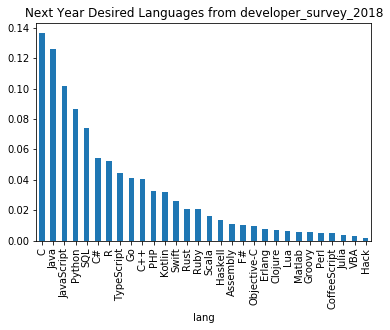

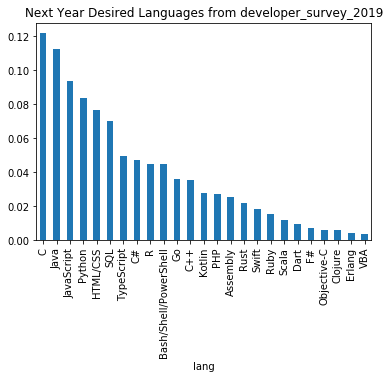

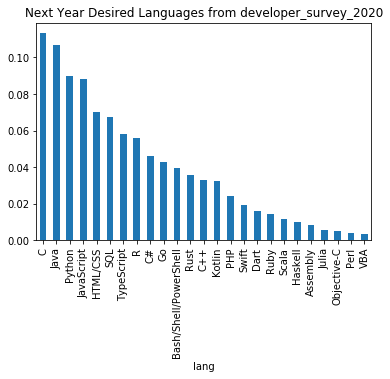

In [8]:
years = ['developer_survey_2018','developer_survey_2019','developer_survey_2020']
dfs = list()
for year in years:
    dfs.append(pd.read_csv('../'+year+'/survey_results_public.csv'))

props_dfs = list()
for idx in [0,1,2]:
    props_dfs.append(clean_and_plot(dfs[idx], years[idx]))



There are quite a few languages in this data set, but for the most part, we see that C, Java, Python, and JavaScript are consistently top 4. It's interesting to note the entire lack of HTML/CSS from the 2018 results given their status as either number 4 or number 5 in 2019 and 202 respectively. It also seems that SQL was consistently 6th.

Additionally, we can see that the dominance of the top languages of C and Java drop slightly while the rest appear to not shift too much at first glance.

Let's see how the actual percentages change between years to get a better understanding.

To do this, we will view this resulting data as sets of year-to-year bar charts demonstrating the change over time.

In [9]:
def bar_comp(df1, df2, year1, year2):
    '''
    INPUT 
        df1 - Dataframe containing the counts of languages developers desire to work with for Year1
        df2 - Dataframe containing the counts of languages developers desire to work with for Year2
        year1 - String for the name of the survey data associated with Year1
        year2 - String for the name of the survey data associated with Year2
        
    OUTPUT
        comp_df - Dataframe of the combined survey data for both years and the difference.
        Displays a delta comparison of language counts percentages related to the LanguageDesireNextYear column.
    '''

    comp_df = pd.merge(df1, df2, left_index=True, right_index=True)
    comp_df.columns = [year1, year2]
    comp_df['Diff_LanguageDesireNextYear_Vals'] = comp_df[year2] - comp_df[year1]
    comp_df.style.bar(subset=['Diff_LanguageDesireNextYear_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])
    return comp_df

delta1819 = bar_comp(props_dfs[0], props_dfs[1], years[0], years[1])
delta1920 = bar_comp(props_dfs[1], props_dfs[2], years[1], years[2])
delta1820 = bar_comp(props_dfs[0], props_dfs[2], years[0], years[2])


To look at how a language popularity has changed, let's sort by the difference column (remember, that was the more recent survey minus the less recent survey results) where we can see that the top contender, C, dropped by 1.4% marketshare while a language right in the middle of the pack, Assembly, actually went up by 1.4% share. The vast majority of languages changes less than 1% (generally, results were between 1.4 up and 1.4 down with many being between -0.8% and +0.4%.

You may notice that some languages don't appear on all three sets of survey results - this ends up leaving gaps in the bar charts where ideally, either the earlier year or the latter year would show a 0% share.


In [10]:
delta1819.sort_values('Diff_LanguageDesireNextYear_Vals')


,developer_survey_2018,developer_survey_2019,Diff_LanguageDesireNextYear_Vals
lang,,,
C,0.136301,0.122041,-0.014260
Java,0.126037,0.112778,-0.013259
JavaScript,0.101911,0.093676,-0.008235
Swift,0.025721,0.018426,-0.007295
R,0.052186,0.045007,-0.007179
C#,0.054099,0.047004,-0.007095
PHP,0.032440,0.026879,-0.005561
Ruby,0.020729,0.015182,-0.005547
Go,0.041143,0.035721,-0.005423


Repeating for 2019-2020 results shows similar ranges of shifts in popularity but with C and Assembly both dropping this time. Assembly lost the most share which also puts it near the bottom in terms of on-going popularity for the coming year.


In [11]:
delta1920.sort_values('Diff_LanguageDesireNextYear_Vals')


,developer_survey_2019,developer_survey_2020,Diff_LanguageDesireNextYear_Vals
lang,,,
Assembly,0.025294,0.008324,-0.016970
C,0.122041,0.113427,-0.008614
HTML/CSS,0.076729,0.070025,-0.006704
Java,0.112778,0.106772,-0.006006
JavaScript,0.093676,0.088287,-0.005389
Bash/Shell/PowerShell,0.044605,0.039538,-0.005067
SQL,0.070282,0.067325,-0.002957
PHP,0.026879,0.023956,-0.002922
C++,0.035294,0.032890,-0.002403


Just for fun, let's also check out the total shift from 2018 to 2020. In general, we see the same kind of trend as we'd come to expect. C has lost about 2.3% share over the two years. Similarly, Java has also seen a 1.9% decline. The less extreme changes (excluding the top 3 leaders on either end) show a range of -0.8% to +0.4% suggesting a relatively consistent market desire from them. They are also definitely shifting around or making way for newer languages, but they remain at less than half, for the most part, the swing of leaders which have between 1.4 and 2% deltas.

This does not demonstrably suggest anything definitive, but powerhouses like C seem to be steadily (if slowly) declining, while more modern / fast languages (like Go or Rust) seem to be gaining the slack.


In [12]:
delta1820.sort_values('Diff_LanguageDesireNextYear_Vals')


,developer_survey_2018,developer_survey_2020,Diff_LanguageDesireNextYear_Vals
lang,,,
C,0.136301,0.113427,-0.022874
Java,0.126037,0.106772,-0.019265
JavaScript,0.101911,0.088287,-0.013624
PHP,0.032440,0.023956,-0.008484
C#,0.054099,0.046099,-0.008000
C++,0.040508,0.032890,-0.007617
SQL,0.074214,0.067325,-0.006889
Swift,0.025721,0.019024,-0.006697
Ruby,0.020729,0.014105,-0.006624
